# 2.1 Determinant

This section introduces the determinant of matrices and explores some of their properties, applications, and computation methods. The determinant of a square matrix is a useful concept in linear algebra and have many theoretical and practical roles, including:

1. Determining the invertibility of a matrix.
2. Determining the linear dependency of a set of vectors.
3. Computing the area of parallelograms or the volume of parallelepipeds.
4. Solving linear systems (Cramer's rule).
5. Finding the inverse of an invertible matrix.

Note that applications (4) and (5) are based on Cramer's rule, which is a theoretical tool but not an efficient computational method. We won't discuss Cramer's rule.



## Cofactor expansion

In the previous section, we defined the determinant of a $2\times 2$ matrix as $det(A) = ad-bc$, where $A = \begin{bmatrix} a & b \\ c & d \end{bmatrix}$. To extend this definition to larger matrices, we follow a recursive approach. For example, to find the determinant of a $3\times 3$ matrix, we can use $2\times 2$ determinants.

Let $A = \begin{bmatrix} a_{11} & a_{12} & a_{13} \\ a_{21} & a_{22} & a_{23} \\ a_{31} & a_{32} & a_{33} \end{bmatrix}$ be a general $3\times 3$ matrix. For any entry $a_{ij}$, let $A_{ij}$ denote a $2\times 2$ submatrix of $A$ defined by removing the row and column of $A$ that contain $a_{ij}$. For example, $A_{12} = \begin{bmatrix} a_{21} & a_{23} \\ a_{31} & a_{33} \end{bmatrix}$ and $A_{23} = \begin{bmatrix} a_{11} & a_{13} \\ a_{31} & a_{33} \end{bmatrix}$.

__Example 1:__ Write a Python code that prints all submatrices of $M = \begin{bmatrix} 1 & 2 & 3\\ 4 & 5 & 6\\ 7 & 8 & 9 \end{bmatrix}$.

__Solution:__

In [1]:
import numpy as np
M = np.array([[1,2,3],[4,5,6],[7,8,9]])
M

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [2]:
for j in range (3):
    for i in range (3):
        submatrix = np.delete( (np.delete(M, i , 0)), j ,1)
        print (' \n M(',i,j, ') = \n \n', submatrix) 
        print(30*"*")

 
 M( 0 0 ) = 
 
 [[5 6]
 [8 9]]
******************************
 
 M( 1 0 ) = 
 
 [[2 3]
 [8 9]]
******************************
 
 M( 2 0 ) = 
 
 [[2 3]
 [5 6]]
******************************
 
 M( 0 1 ) = 
 
 [[4 6]
 [7 9]]
******************************
 
 M( 1 1 ) = 
 
 [[1 3]
 [7 9]]
******************************
 
 M( 2 1 ) = 
 
 [[1 3]
 [4 6]]
******************************
 
 M( 0 2 ) = 
 
 [[4 5]
 [7 8]]
******************************
 
 M( 1 2 ) = 
 
 [[1 2]
 [7 8]]
******************************
 
 M( 2 2 ) = 
 
 [[1 2]
 [4 5]]
******************************


The determinant of $A$, expanded over the first row, is defined as:

$$ det(A) = \sum_{k=1}^{3} (-1)^{1+k} a_{1k}|A_{1k}| = a_{11}|A_{11}| - a_{12}|A_{12}| + a_{13}|A_{13}|$$

Here $|A_{ij}|$ represents the determinant of the $A_{ij}$. Note that choosing a different row or column would give the same value. For example, using the second row:

$$ det(A) = \sum_{k=1}^{3} (-1)^{2+k} a_{2k}|A_{2k}| = -a_{21}|A_{21}| + a_{22}|A_{22}| - a_{23}|A_{23}|$$

Similarly, using the second column:

$$ det(A) = \sum_{k=1}^{3} (-1)^{k+2} a_{k2}|A_{k2}| = -a_{12}|A_{12}| + a_{22}|A_{22}| - a_{32}|A_{32}|$$


__Example 2__ Compute the determinent of $M= \begin{bmatrix} 0 & 1 & 2\\ 1 & 0 & 3\\ 4 & -3 & 8 \end{bmatrix}$.

__Solution:__ 
Lets write a Python code that computes the determinant of a $3\times 3$ matrix:

In [3]:
M = np.array([[0,1,2],[1,0,3],[4,-3,8]])

In [5]:
# Computes a 2x2 determinant
def det2(matrix):
    
    if matrix.shape == (2, 2):
        return matrix[0,0] * matrix[1,1] - matrix[0,1] * matrix[1,0]
    else:
        print("Please enter a 2x2 matrix")

# Computes the 3x3 determinat over a given row

def det3(matrix, row):
    if matrix.shape == (3, 3) and row in range(3):
        det = 0
        for j in range(3):
            submatrix = np.delete( (np.delete(matrix, row , 0)), j ,1)   
            det += (-1) ** (row + j) * matrix[row, j] * det2(submatrix)
        return det
    else:
        print("The input matrix is not 3x3 or the row is not chosen in the right range")


In [6]:
det3(M,0)

-2

We can observe that selecting a different row does not affect the value of the determinant:

In [7]:
det3(M,2)

-2

The determinant of an $n\times n$ matrix A can be defined the same way recursievely:

$$
det(A) = \sum^{n}_{i=1} (-1)^{1+i} a_{1i} det(A_{1i})
$$ 

This formula is called __a cofactor expansion across the first row__ of $A$. 

Let's write a Python code that computes the determinant of a square matrix of an arbitary size:

In [9]:
# Computes the determinant of an nxn matrix.

def det(matrix):
    n = matrix.shape[0]
    if n == 1:
        return matrix[0, 0]
    elif n == 2:
        return matrix[0, 0] * matrix[1, 1] - matrix[0, 1] * matrix[1, 0]
    else:
        det = 0
        for j in range(n):
            submatrix = np.delete( (np.delete(matrix, 0 , 0)), j ,1)   
            det += (-1) ** (0 + j) * matrix[0, j] * det2(submatrix)
        return det

In [10]:
# determinant of matrix M
det(M)

-2

## Properties of determinants


Let's discuss the properties of determinants:

If $A = \begin{bmatrix} a & 0 \\ c & d \end{bmatrix}$, then $det(A) = ad$. We can generalize this observation using induction:

__Theorem 1__ 

The determinant of a triangular matrix is the product of its diagonal entries.

Next, we will explore the impact of row operations on determinants.

__Theorem 2__

1. If a multiple of one row of matrix $A$ is added to another row to produce matrix $B$, then $det(A) = det(B)$.

2. If two rows are interchanged to produce matrix $B$, then $det(A) = -det(B)$.

3. If one row is multiplied by a scalar $k$ to produce matrix $B$, then $det(A) = k \cdot det(B)$.

Consequently, if a square matrix $A$ is reduced to $U$ using only row replacements and $r$ row swaps, then

$$
det(A) = (-1)^r \cdot det(U)
$$

By combining __Theorem 1__ and __Theorem 2__, we can compute determinants effectively.

__Example 3:__

Compute $det \begin{bmatrix} 0 & 1 & 2\\ 1 & 0 & 3\\ 4 & -3 & 8 \end{bmatrix} $.

__Solution:__

We first convert the matrix to its row echelon form (REF) and then use Theorem 1 to find the determinant.

In [11]:
M = np.array([[0,1,2],[1,0,3],[4,-3,8]])

# Elementry row operations:

# Swap two rows

def swap(matrix, row1, row2):
    
    copy_matrix=np.copy(matrix).astype('float64') 
  
    copy_matrix[row1,:] = matrix[row2,:]
    copy_matrix[row2,:] = matrix[row1,:]
    
    return copy_matrix


# Multiple all entries in a row by a nonzero number


def scale(matrix, row, scalar):
    copy_matrix=np.copy(matrix).astype('float64') 
    copy_matrix[row,:] = scalar*matrix[row,:]  
    return copy_matrix

# Replacing a row by the sum of itself and a multiple of another 

def replace(matrix, row1, row2, scalar):
    copy_matrix=np.copy(matrix).astype('float64')
    copy_matrix[row1] = matrix[row1]+ scalar * matrix[row2] 
    return copy_matrix

In [12]:
M1 = swap(M, 0, 1)
M1

array([[ 1.,  0.,  3.],
       [ 0.,  1.,  2.],
       [ 4., -3.,  8.]])

In [13]:
M2 = replace(M1, 2, 0, -4)
M2

array([[ 1.,  0.,  3.],
       [ 0.,  1.,  2.],
       [ 0., -3., -4.]])

In [14]:
M3 = replace(M2, 2, 1, 3)
M3

array([[1., 0., 3.],
       [0., 1., 2.],
       [0., 0., 2.]])

Since we used only one row swap, we have:

$$
\text{det}(M) = - \text{det}(M_3)
$$

Using Theorem 2, we have:

$$
\text{det}(M) = - \text{det}(M_3) = -2
$$

As mentioned in the introduction, the determinant can be used to check the invertibility of matrices.

__Theorem 3 (Determinants and Invertibility):__

A square matrix $A$ is invertible if and only if $\text{det}(A) \neq 0$.

__Theorem 4:__

Let $A$ and $B$ be two square matrices of the same size. Then:

1. $\text{det}(A^T) = \text{det}(A)$.

2. $\text{det}(AB) = \text{det}(A) \cdot \text{det}(B)$.

3. If $A$ is invertible, then $\text{det}(A)^{-1} = \frac{1}{\text{det}(A)}$.

__Example 4:__ Compute $\text{det}(B^4)$, where $B = \begin{bmatrix} 1 & 1 & 2\\ 2 & 0 & 3\\ 5 & -3 & 8 \end{bmatrix}$.

__Solution:__ Using Theorem 4 part 2, it's easy to see that $\text{det}(B^4) = (\text{det}(B))^4$.

In [16]:
B = np.array([[1,1,2],[2,0,3],[5,-3,8]])

#compute det(B)
det(B)

#using Theorem 4 to compute det(B)^4

det(B) ** 4


256

## Determinants as Area or Volume


__Theorem 5:__

1. If $A$ is a $2 \times 2$ matrix, then $|\text{det}(A)|$ is the area of the parallelogram determined by the columns of $A$.

2. If $A$ is a $3 \times 3$ matrix, then $|\text{det}(A)|$ is the volume of the parallelepiped determined by the columns of $A$.

In particular, three points $\vec{u}, \vec{v}, \vec{w}$ in $\mathbb{R}^3$ are coplanar ( i.e., they lie on the same plane) if and only if $\text{det}([\vec{u}, \vec{v}, \vec{w}]) = 0$.

The theorem is obviously true for diagonal matrices.

__Example 5:__

1. Let $A = \begin{bmatrix} 3 & 0 \\ 0 & -2 \end{bmatrix}$. The area of the parallelogram determined by $\begin{bmatrix} a \\ 0 \end{bmatrix}$ and $\begin{bmatrix} 0 \\ d \end{bmatrix}$ is $|-6| = 6$.

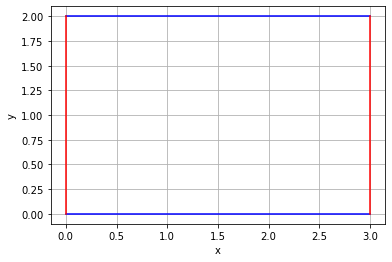

In [17]:
import matplotlib.pyplot as plt

# Define x and y values for the lines
x = range(0, 4)
y1 = [ 0 for k in x]
y2 = [ 2 for k in x]
y = range(0, 3)
x1 = [3 for k in y]
x2 = [0 for k in y]

# Plot the lines on the same plane
plt.plot(x, y1, 'b')
plt.plot(x, y2, 'b')
plt.plot(x1, y, 'r')
plt.plot(x2, y, 'r')

# Add labels to the graph
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

# Show the graph
plt.show()

__Example 6__

Determine if the following points are coplaner.

$\begin{bmatrix} 1 \\ 0  \\2 \end{bmatrix},  
\begin{bmatrix} 4 \\ 3  \\5 \end{bmatrix}, \begin{bmatrix} 3 \\ 4 \\6 \end{bmatrix}$ 


__Solution:__

To determine if the above points are coplanar, we check whether or not $det \left(\ \begin{bmatrix} 1 & 0 & 2 \\ 4 & 3 & 5 \\ 3 & 4 & 6 \end{bmatrix}\ \right) = 0$:

In [18]:
A = np.array([[1,0,2],[4,3,5],[3,4,6]])

det(A)

12

Since $det(A)\neq 0$, the mentioned points are not coplanar. In fact they form a parrallelopiped of volume 12. 

## Numerical Note



In this section, we discussed two different ways to compute the determinant of a square matrix: cofactor expansion and row operations.  

While cofactor expansion is a straightforward approach, it becomes computationally impossible for large matrices. In fact, cofactor expansion requires $n!$ multiplications for an $n \times n$ matrix. If a computer can perform a trillion multiplications per second, computing the determinant of a $25 \times 25$ matrix would take approximately $500 \times 500$ years!

On the other hand, evaluating the determinant of an $n \times n$ matrix using row operations involves about $\frac{2n^3}{3}$ arithmetic operations. Using this method, the determinant of a $25 \times 25$ matrix can be computed in a fraction of a second on most microcomputers.
 

## Exercises:

1. Let $A$ be an $n\times n$ matrix such that $A^2 = I_n$. Show that $det(A) = \pm 1$.

2. Find the determinant of $A = \begin{bmatrix} 1 & 1 & 2 \\ 2 & 0 & 3 \\ 5 & -3 & 8 \end{bmatrix}$ using the row reduction method.

3. Use determinants to decide if the set $\left\lbrace \begin{bmatrix} 1 \\ 2 \\ 3 \end{bmatrix}, \begin{bmatrix} 4 \\ 5 \\ 6 \end{bmatrix}, \begin{bmatrix} 7 \\ 8 \\ 9 \end{bmatrix} \right\rbrace$ is linearly independent.

4. Suppose $A$, $B$, $P$ are $n\times n$ matrices, $P$ is invertible, and $r$ is a real number. Mark True or False:

   a. $det(A+B) = det(A) + det(B)$.
   
   b. $det(rA) = r \cdot det(A)$.
   
   c. $det(PAP^{-1}) = det(A)$.

5. Determine if the following points are coplanar (i.e., they lie on the same plane):

   $\begin{bmatrix} 1 \\ 0 \\ 2 \end{bmatrix}, \begin{bmatrix} 4 \\ 3 \\ 5 \end{bmatrix}, \begin{bmatrix} 3 \\ 0 \\ 6 \end{bmatrix}$